In [1]:
import torch
import torch.nn as nn
import numpy as np

In [6]:
network = nn.Sequential(nn.Linear(13, 45), nn.ReLU(), nn.Linear(45, 40), nn.ReLU(), nn.Linear(40, 7))

In [7]:
network.load_state_dict(torch.load("network.pt"))

<All keys matched successfully>

In [8]:
import pickle
from joblib import dump
from joblib import load

In [9]:
loaded_rf_model = load('RFMODEL.joblib')

In [10]:
database = torch.load("database.pt")

In [11]:
state = torch.tensor(database["state"], dtype = torch.float)
action = torch.tensor(database['action'].toarray(), dtype = torch.float)
reward = torch.tensor(database['reward'], dtype = torch.float)

In [12]:
state

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.4358, 0.8733, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4328, 0.8764, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4292, 0.8797, 0.0000],
        ...,
        [0.0918, 0.0535, 0.0918,  ..., 0.4819, 0.4819, 0.0000],
        [0.0971, 0.0566, 0.0971,  ..., 0.4692, 0.4692, 0.0000],
        [0.1278, 0.0745, 0.1278,  ..., 0.4047, 0.4047, 0.0000]])

In [13]:
loaded_rf_model.predict(state[:100])

array([2, 6, 2, 3, 6, 2, 6, 3, 2, 2, 6, 2, 2, 3, 6, 2, 6, 2, 2, 0, 6, 6,
       2, 3, 2, 1, 2, 6, 2, 2, 2, 6, 6, 2, 6, 2, 6, 2, 2, 3, 2, 6, 2, 2,
       6, 1, 2, 6, 6, 2, 3, 2, 6, 2, 6, 2, 2, 6, 2, 2, 6, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 6, 6, 6, 2, 6, 2, 6, 6, 6, 3,
       6, 6, 6, 3, 2, 6, 2, 6, 6, 2, 3, 6], dtype=int64)

In [14]:
network(state[:100]).argmax(-1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [15]:
state[0]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4098e-02, 2.4307e-04,
        0.0000e+00, 2.4307e-03, 1.2153e-03, 2.1706e-01, 4.3582e-01, 8.7335e-01,
        0.0000e+00])

In [16]:
action

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])

In [17]:
predictions = network(state).argmax(-1)

In [48]:
predictions

tensor([0, 0, 0,  ..., 0, 0, 0])

In [18]:
unique_values, counts = np.unique(predictions, return_counts=True)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 7 artists>

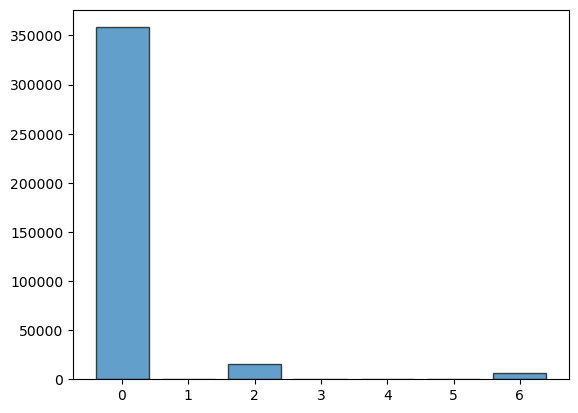

In [20]:
plt.bar(unique_values, counts, align='center', alpha=0.7, edgecolor='black')


In [22]:
unique_values

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [33]:
options = {
 0 : "field_goal",
 1 : "no_play",
 2 : "pass",
 3 : "punt",
 4 : "qb_kneel",
 5 : "qb_spike",
 6 : 'run'    
}

In [34]:
play_types = [options[value] for value in unique_values]

In [38]:
play_types

['field_goal', 'no_play', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']

<BarContainer object of 7 artists>

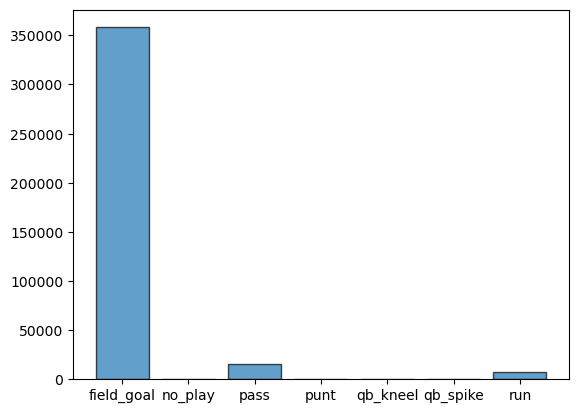

In [35]:
plt.bar(play_types, counts, align='center', alpha=0.7, edgecolor='black')


<BarContainer object of 6 artists>

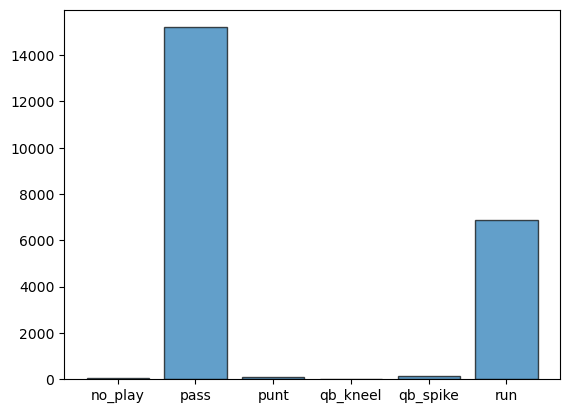

In [40]:
new_counts = [54, 15202, 73, 9, 141, 6892]
new_play_types = ['no_play', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
plt.bar(new_play_types, new_counts, align='center', alpha=0.7, edgecolor='black')

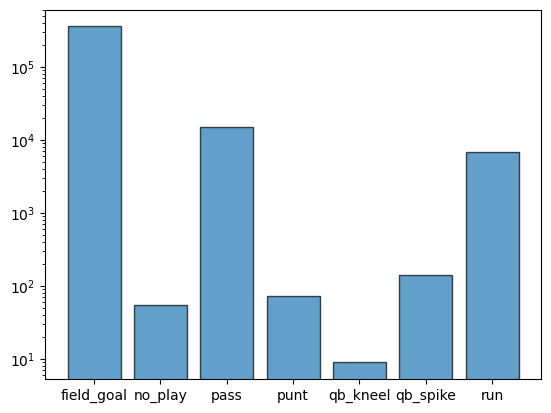

In [46]:
data = [358320, 54, 15202, 73, 9, 141, 6892]

# Plotting the bar chart with log scale
plt.bar(play_types, data, align='center', alpha=0.7, edgecolor='black')
plt.yscale('log')  # Set the y-axis to a logarithmic scale


In [23]:
counts

array([358320,     54,  15202,     73,      9,    141,   6892],
      dtype=int64)

In [61]:
actions = np.argmax(action, axis = 1)

In [28]:
correct_predictions = sum(pred == act for pred, act in zip(predictions, actions))

In [29]:
percentage_correct = (correct_predictions / len(predictions)) * 100

In [30]:
print(f"Percentage of correct predictions: {percentage_correct:.2f}%")

Percentage of correct predictions: 4.58%


In [51]:
non_zero_indices = np.where(predictions != 0)[0]
filtered_predictions = predictions[non_zero_indices]
filtered_actions = actions[non_zero_indices]

In [52]:
print("Original length of predictions:", len(predictions))
print("New length after removing zeros:", len(filtered_predictions))
print("Original length of actions:", len(actions))
print("New length of filtered actions:", len(filtered_actions))

Original length of predictions: 380691
New length after removing zeros: 22371
Original length of actions: 380691
New length of filtered actions: 22371


In [53]:
new_correct_predictions = sum(pred == act for pred, act in zip(filtered_predictions, filtered_actions))

In [57]:
new_percentage_correct = (correct_predictions / len(filtered_predictions)) * 100

In [58]:
print(f"Percentage of correct predictions: {new_percentage_correct:.2f}%")

Percentage of correct predictions: 78.01%


In [68]:
action_unique_values, action_counts = np.unique(actions, return_counts=True)

<BarContainer object of 7 artists>

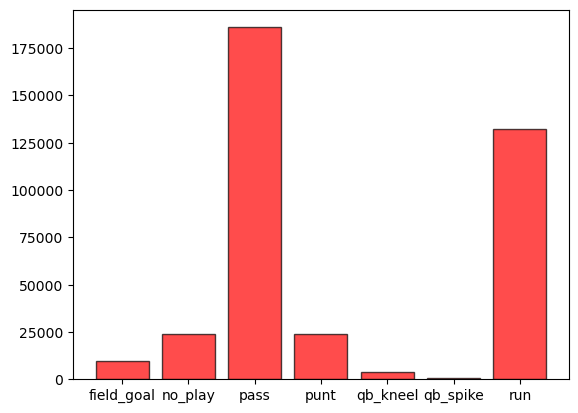

In [71]:
plt.bar(play_types, action_counts, color = "red", align='center', alpha=0.7, edgecolor='black')

In [67]:
action_counts

array([2284146,  380691], dtype=int64)

In [162]:
filtered_predictions

tensor([2, 2, 2,  ..., 2, 2, 2])

In [74]:
pred = network(state)

In [76]:
pred.shape

torch.Size([380691, 7])

In [78]:
from scipy.special import softmax


In [92]:
preds = pred.detach().numpy()

In [95]:
preds

array([[ 3.0561924e+01,  8.0452204e-02,  4.5076618e+00, ...,
        -1.3128867e+00,  3.7897938e-01,  5.8002424e+00],
       [ 3.0602043e+01, -3.9769113e-02,  1.8094349e-01, ...,
        -1.2242498e+00,  3.5355920e-01,  2.7024744e+00],
       [ 2.9566845e+01, -5.6071341e-02,  4.5697093e-01, ...,
        -1.1991509e+00,  3.4451017e-01,  2.9885216e+00],
       ...,
       [ 2.6640480e+01, -6.6164911e-02,  1.1047853e+01, ...,
        -9.7144830e-01, -2.5916655e-02,  8.3880558e+00],
       [ 2.8427170e+01, -1.0499364e-01,  8.7788534e+00, ...,
        -9.5401889e-01, -6.0520630e-02,  8.7553988e+00],
       [ 2.1624329e+01, -1.4908016e-01,  1.0167305e+01, ...,
        -9.3241072e-01, -7.1088046e-02,  9.3353090e+00]], dtype=float32)

In [93]:
softmax_scores = softmax(preds)


In [94]:
softmax_scores

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [117]:
from sklearn.preprocessing import Normalizer

In [118]:
scaler = Normalizer()
preds_normalized = scaler.fit_transform(preds)


In [119]:
preds_normalized

array([[ 9.7138256e-01,  2.5570991e-03,  1.4327188e-01, ...,
        -4.1728895e-02,  1.2045510e-02,  1.8435536e-01],
       [ 9.9520743e-01, -1.2933292e-03,  5.8844537e-03, ...,
        -3.9813764e-02,  1.1498080e-02,  8.7887026e-02],
       [ 9.9391228e-01, -1.8848814e-03,  1.5361430e-02, ...,
        -4.0310383e-02,  1.1580975e-02,  1.0046145e-01],
       ...,
       [ 8.8637179e-01, -2.2014135e-03,  3.6757994e-01, ...,
        -3.2321654e-02, -8.6228899e-04,  2.7908418e-01],
       [ 9.1608292e-01, -3.3834842e-03,  2.8290391e-01, ...,
        -3.0743841e-02, -1.9503143e-03,  2.8214806e-01],
       [ 8.4214765e-01, -5.8058454e-03,  3.9596015e-01, ...,
        -3.6312226e-02, -2.7684851e-03,  3.6355850e-01]], dtype=float32)

In [155]:
softmax_matrix.shape

(380691, 7)

In [126]:
softmax_matrix = np.apply_along_axis(lambda x: softmax(x), axis=1, arr=preds_normalized)

In [137]:
max_probabilities = np.max(softmax_matrix, axis=1)

In [153]:
filtered_rows = softmax_matrix[max_probabilities > 0.323]

In [154]:
filtered_rows.shape

(12, 7)

In [132]:
softmax_matrix.shape

(380691, 7)

In [157]:
np. set_printoptions(threshold = np.inf) 

In [165]:
highest_prob_rows = softmax_scores[np.arange(len(softmax_scores)), np.argmax(softmax_scores[:, 2])]

IndexError: index 153789 is out of bounds for axis 1 with size 7

([<matplotlib.patches.Wedge at 0x29faa1a3610>,
 [Text(0.6623118405223329, 0.8782613653713341, 'field_goal'),
  Text(-0.6475895065530343, 0.8891725541211885, 'no_play'),
  Text(-1.0809403154990325, 0.20388240318588693, 'pass'),
  Text(-0.9268953966297551, -0.5923385212077373, 'punt'),
  Text(-0.34112373248653743, -1.0457698595458054, 'qb_kneel'),
  Text(0.40259858361228057, -1.0236768926147477, 'qb_spike'),
  Text(1.0039919672182145, -0.4494442454424128, 'run')],
 [Text(0.36126100392127247, 0.47905165383890946, '29.4%'),
  Text(-0.3532306399380186, 0.48500321133882995, '11.2%'),
  Text(-0.5896038084540176, 0.11120858355593831, '12.9%'),
  Text(-0.5055793072525936, -0.32309373884058395, '11.2%'),
  Text(-0.18606749044720222, -0.570419923388621, '10.7%'),
  Text(0.21959922742488028, -0.5583692141534987, '11.3%'),
  Text(0.5476319821190261, -0.2451514066049524, '13.4%')])

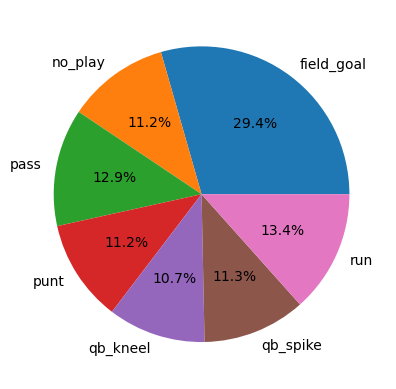

In [136]:
plt.pie(softmax_scores[0], labels = play_types, autopct='%1.1f%%')

In [171]:
state

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.4358, 0.8733, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4328, 0.8764, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4292, 0.8797, 0.0000],
        ...,
        [0.0918, 0.0535, 0.0918,  ..., 0.4819, 0.4819, 0.0000],
        [0.0971, 0.0566, 0.0971,  ..., 0.4692, 0.4692, 0.0000],
        [0.1278, 0.0745, 0.1278,  ..., 0.4047, 0.4047, 0.0000]])

In [170]:

actions

tensor([2, 6, 2,  ..., 2, 2, 2])

In [166]:
loaded_rf_model.predict(state)

array([2, 6, 2, 3, 6, 2, 6, 3, 2, 2, 6, 2, 2, 3, 6, 2, 6, 2, 2, 0, 6, 6,
       2, 3, 2, 1, 2, 6, 2, 2, 2, 6, 6, 2, 6, 2, 6, 2, 2, 3, 2, 6, 2, 2,
       6, 1, 2, 6, 6, 2, 3, 2, 6, 2, 6, 2, 2, 6, 2, 2, 6, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 6, 6, 6, 2, 6, 2, 6, 6, 6, 3,
       6, 6, 6, 3, 2, 6, 2, 6, 6, 2, 3, 6, 2, 2, 6, 2, 1, 2, 3, 6, 6, 2,
       3, 2, 6, 2, 6, 2, 2, 0, 2, 2, 2, 2, 1, 2, 6, 2, 2, 2, 6, 6, 1, 0,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 6, 1, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2, 2,
       0, 6, 2, 6, 2, 2, 6, 2, 0, 6, 6, 2, 3, 6, 2, 6, 6, 3, 2, 6, 6, 2,
       6, 6, 2, 6, 6, 6, 2, 0, 6, 2, 2, 3, 2, 2, 6, 6, 6, 2, 6, 2, 6, 1,
       6, 6, 6, 0, 2, 6, 6, 3, 2, 1, 6, 6, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 6, 6, 6, 1, 2, 6, 2, 1, 6, 6, 6, 6, 6, 2, 6, 2, 6, 2, 2, 6,
       6, 6, 6, 6, 6, 2, 2, 2, 2, 6, 1, 2, 2, 6, 1, 2, 3, 6, 2, 6, 2, 3,
       2, 2, 1, 2, 2, 6, 6, 6, 2, 2, 0, 1, 2, 2, 2, 3, 6, 2, 2, 2, 2, 2,
       2, 6, 6, 2, 3, 6, 2, 2, 2, 2, 2, 1, 2, 2, 2,

In [167]:
action[0]

tensor([0., 0., 1., 0., 0., 0., 0.])

In [200]:
from sklearn.preprocessing import Normalizer

In [208]:
transformer_state = Normalizer().fit(state)

In [218]:
test_state = [[0,0.0,0.0,0.0,56.0,3.0,0.0,8,2,815.0,1715.0,3515.0,0]]

In [219]:
normal_state = transformer_state.transform(test_state)

In [220]:
loaded_rf_model.predict(normal_state)

array([2], dtype=int64)

In [221]:
test_2 = [[10.0, 14.0, 10.0, 4.0, 72.0, 3.0, 0.0, 1.0, 13.0, 760.0, 760.0, 2560.0, 0.0]]

In [222]:
normal_state_2 = transformer_state.transform(test_2)

In [224]:
loaded_rf_model.predict(normal_state_2)

array([6], dtype=int64)

In [234]:
test_3 = [[7.0, 7.0, 14.0, -7.0, 83.0, 3.0, 1.0, 17.0, 60.0, 300.0, 300.0, 300.0, 0.0]] 

In [235]:
normal_state_3 = transformer_state.transform(test_3)

In [236]:
loaded_rf_model.predict(normal_state_3)

array([2], dtype=int64)